In [93]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from matplotlib import cm, gridspec
from mpl_toolkits.mplot3d import Axes3D

In [110]:
# Generate the data set
np.random.seed(1)
n_obs_pc = 10
x1 = np.random.normal(0, 1, n_obs_pc)
y1 = np.zeros(n_obs_pc)
x2 = np.random.normal(3, 1, n_obs_pc)
y2 = np.ones(n_obs_pc)

X = np.concatenate([x1,x2])
y = np.concatenate([y1,y2])

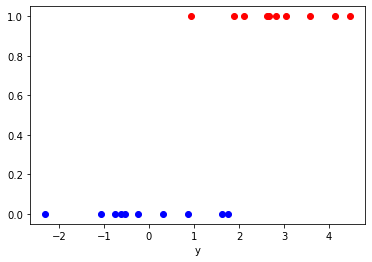

In [113]:
# Visualize the data set
plt.scatter(x1, y1, color = "blue")
plt.scatter(x2, y2, color = "red")
plt.xlabel('x')
plt.xlabel('y')
plt.show()

In [114]:
def logistic_predict(w,b,x):
    return 1/(1+tf.math.exp(-(w*x+b)))
def logistic_cost(w,b,x,y):
    m = y.shape[0]
    y_pred = logistic_predict(w,b,x)
    cost = - 1/m * tf.math.reduce_sum(y * tf.math.log(y_pred) + (1-y)* tf.math.log(1- y_pred))
    return cost
              
def least_sq_cost(w,b,x,y):
    m = y.shape[0]
    y_pred = logistic_predict(w,b,x)
    cost = - 1/m * tf.math.reduce_sum((y_pred-y)**2)
    return cost

# Train the model
optimizer = Adam(learning_rate =0.001)
w = tf.Variable(np.random.randn(), name = "w", dtype = tf.float64)
b = tf.Variable(np.random.randn(), name = "b", dtype = tf.float64)
n_iter = 3000
cost_history = []
for i in range(n_iter):
    with tf.GradientTape() as tape:
        cost = logistic_cost(w,b, X, y)
    cost_history.append(cost)
    grads = tape.gradient(cost, [w,b])
    optimizer.apply_gradients(zip(grads, [w,b]))

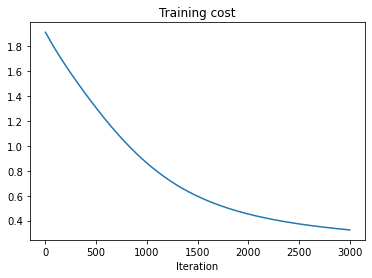

w:0.87;b:-1.14


In [115]:
# Visualize the training cost
plt.plot(range(len(cost_history)),cost_history)
plt.title('Training cost')
plt.xlabel('Iteration')
plt.show()
print(f"w:{round(w.numpy(),2)};b:{round(b.numpy(),2)}")

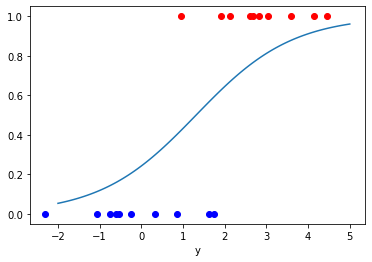

In [116]:
# Visualize the data set
x_range = np.linspace(-2,5,100)
plt.scatter(x1, y1, color = "blue")
plt.scatter(x2, y2, color = "red")
plt.plot(x_range, logistic_predict(w,b,x_range))
plt.xlabel('x')
plt.xlabel('y')
plt.show()

In [117]:
W_range = np.linspace(-10, 10, 100)
b_range = np.linspace(-10, 10, 100)
W, B = np.meshgrid(W_range,b_range)
fitspace1 = np.zeros(W.shape)
fitspace2 = np.zeros(W.shape)
m,n = fitspace1.shape
for i in range(m):
    for j in range(n):
        fitspace1[i,j] = logistic_cost(W[i,j],B[i,j],X,y)
        fitspace2[i,j] = least_sq_cost(W[i,j],B[i,j],X,y)

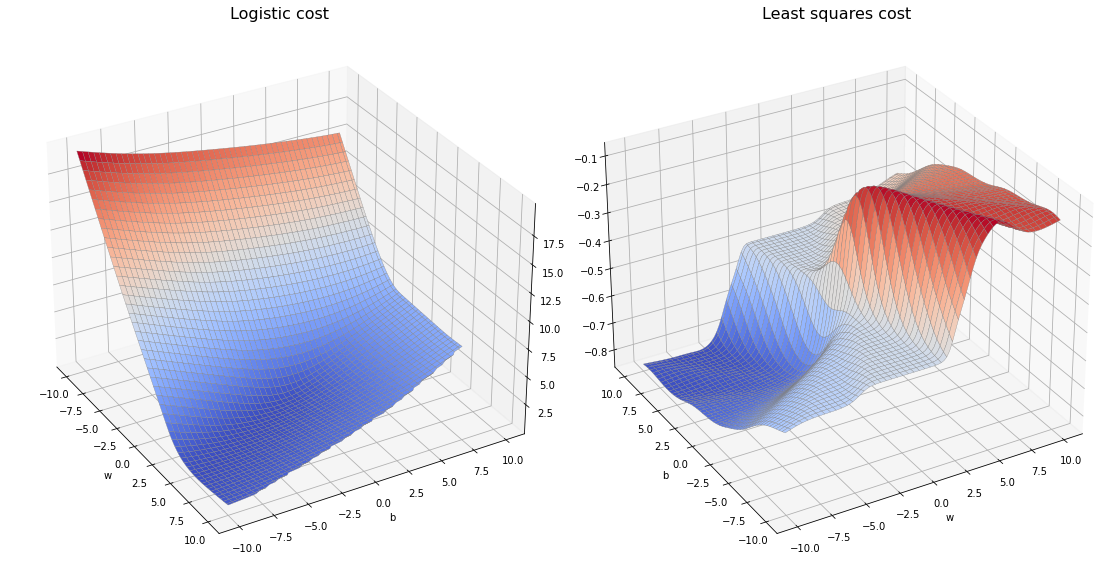

In [118]:
spec = gridspec.GridSpec(ncols=2, nrows=1,
                         width_ratios=[1, 1], wspace=0)
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(spec[:,0], projection='3d')
ax2 = fig.add_subplot(spec[:,1], projection='3d')

ax1.plot_surface(W, B, fitspace1, cmap=cm.coolwarm, linewidth=0.3, edgecolor = 'gray')
ax1.view_init(elev = 30, azim = -30)
ax1.set_title('Logistic cost', fontsize = 16)
ax1.set_xlabel('w')
ax1.set_ylabel('b')

ax2.plot_surface(W, B, fitspace2, cmap=cm.coolwarm, linewidth=0.3, edgecolor = 'gray')
ax2.view_init(elev = 30, azim = -120)
ax2.set_title('Least squares cost', fontsize = 16)
ax2.set_xlabel('w')
ax2.set_ylabel('b')


plt.show()